In [ ]:
print("We Are In God's Hands\n Besmillah")

We Are In God's Hands
 Besmillah


# Objectif : Construire un système qui recommande des films à un utilisateur en se basant sur les notes qu'il a déjà données, ainsi que sur les notes de tous les autres utilisateurs.

### jeu de données idéal pour commencer : Le dataset MovieLens. Il est très célèbre, propre et existe en plusieurs tailles. Nous commencerons avec la version "small" (100k ratings).

### Il contient des fichiers comme movies.csv (liste des films avec leurs genres) et ratings.csv (un utilisateur, un film, une note, un timestamp).

## Les Concepts de Base des Systèmes de Recommandation :

Il existe principalement deux grandes approches. Nous allons nous concentrer sur la plus classique et la plus puissante pour commencer.

# Filtrage Collaboratif : Fondamentaux

C'est l'idée fondamentale derrière la plupart des systèmes de recommandation.

**Principe** :  
_"Dis-moi qui tu aimes, je te dirai qui tu es"._  
Le système ne connaît rien des films eux-mêmes (ni le réalisateur, ni les acteurs, ni le synopsis). Il se base uniquement sur les interactions des utilisateurs avec les films.

**Intuition** :  
Si deux utilisateurs, Alice et Bob, ont noté de manière similaire plusieurs films par le passé (par exemple, ils ont tous les deux adoré *Star Wars* et *Le Seigneur des Anneaux*), alors si Alice a aimé un nouveau film que Bob n'a pas encore vu, il y a de fortes chances que Bob l'aime aussi.  
→ Le système va donc recommander ce film à Bob.

---

## Types de Filtrage Collaboratif

Le filtrage collaboratif se divise en deux sous-méthodes principales :

### a) Basé sur la Mémoire (*Memory-Based*)

#### • User-User Collaborative Filtering
- On trouve les **k utilisateurs les plus similaires** à notre utilisateur cible.
- On regarde les films que ces utilisateurs similaires ont bien notés, mais que notre utilisateur n'a pas encore vus.
- On recommande ces films à notre utilisateur.

#### • Item-Item Collaborative Filtering
- On trouve les **k films les plus similaires** à un film donné.
- Quand un utilisateur regarde un film, on lui recommande les films les plus similaires.
- C’est la logique derrière la section _"Les clients qui ont acheté cet article ont également acheté..."_ d’Amazon.

---

### b) Basé sur un Modèle (*Model-Based*) — 💡 **C’est ce que nous allons faire !**

**Principe** :  
**La Factorisation de Matrices** (*Matrix Factorization*), une technique puissante et populaire.

---

## L'idée

Imaginez une **immense matrice** avec :
- Les **utilisateurs en lignes**
- Les **films en colonnes**
- Les **notes données** dans les cases

Mais cette matrice est **très creuse** (*sparse*) : la majorité des utilisateurs n’ont noté qu’une petite fraction des films.

### Objectif
Prédire les **notes manquantes** dans cette matrice.

---

## Comment ?

La factorisation de matrices suppose que :
- Chaque **utilisateur** peut être décrit par un petit nombre de **caractéristiques latentes**
- Chaque **film** aussi

Ces **caractéristiques latentes** sont "cachées" (non connues explicitement) :  
→ Ce n’est pas le genre, ni l’acteur, mais des dimensions comme :
- Le niveau de comédie
- La présence d’action
- La complexité du scénario  
...etc.

➡️ Le modèle apprend ces dimensions **tout seul** !

---

## Décomposition de la matrice

On va décomposer notre grande matrice en deux matrices plus petites :

- Une **matrice Utilisateurs** : `(utilisateurs x caractéristiques latentes)`
- Une **matrice Films** : `(films x caractéristiques latentes)`

### Prédiction

Pour prédire la note d’un utilisateur sur un film :
→ On fait simplement le **produit scalaire** (*dot product*) du vecteur de l’utilisateur et du vecteur du film.

### Entraînement du modèle

Le modèle apprend les **meilleurs vecteurs** pour les utilisateurs et les films en :
- Comparant ses notes prédites aux notes réelles du dataset
- Essayant de **minimiser l'erreur**

---









# 🧠 Comprendre l'Entraînement par Factorisation de Matrices

## 🎵 L'Analogie des Goûts Musicaux

Imaginez qu'on veuille décrire les **goûts musicaux** d'une personne.  
Au lieu de lister tous les artistes qu'elle aime, on pourrait la caractériser selon **deux axes fondamentaux** :

- **Axe 1** : "Classique" ↔ "Moderne" (valeurs de -1 à 1)  
- **Axe 2** : "Acoustique" ↔ "Électronique" (valeurs de -1 à 1)

Ces axes sont des **caractéristiques latentes**.  
Elles sont "latentes" car elles ne sont **pas définies explicitement** : on les imagine pour simplifier le problème.

---

## 1. Décrire les Utilisateurs

| Utilisateur | Moderne | Électronique | Description |
|-------------|---------|--------------|-------------|
| **Alice**   | -0.8    | -0.9         | Aime le rock des années 70 et la folk (très classique, très acoustique) |
| **Bob**     | 0.9     | 0.7          | Écoute de la pop actuelle et du rap (très moderne, plutôt électronique) |
| **Carole**  | 0.2     | 0.8          | Aime le trip-hop et la synth-pop des années 80 (moderne et très électronique) |

---

## 2. Décrire les Artistes (ou Films)

| Artiste / Film | Moderne | Électronique | Description |
|----------------|---------|--------------|-------------|
| **Led Zeppelin** | -0.9 | -0.8 | Très classique, très acoustique |
| **Daft Punk**    | 0.7  | 1.0  | Moderne et 100% électronique |
| **Ed Sheeran**   | 0.8  | -0.7 | Moderne mais très acoustique |

---

## 3. Prédire si Alice va aimer Daft Punk

**Vecteur d'Alice** : `[-0.8, -0.9]`  
**Vecteur de Daft Punk** : `[0.7, 1.0]`

➡️ Produit scalaire =  
`(-0.8 * 0.7) + (-0.9 * 1.0) = -0.56 - 0.9 = -1.46`

👉 **Score très négatif** → Elle n’aimera probablement pas.

---

### Autre exemple : Alice & Led Zeppelin

**Vecteur de Led Zeppelin** : `[-0.9, -0.8]`  
➡️ Produit scalaire =  
`(-0.8 * -0.9) + (-0.9 * -0.8) = 0.72 + 0.72 = 1.44`  
👉 **Score très positif** → Elle va probablement adorer.

---

# 🔍 Et maintenant, revenons à la Factorisation de Matrices

Le **modèle de factorisation de matrices** fait la même chose, mais :

- À **très grande échelle**
- De manière **automatique**

---

## 📊 Le Point de Départ

- Une **grande matrice vide** : `Utilisateurs x Films`
- L’objectif : la **compléter** avec les notes manquantes.

On veut la décomposer en deux matrices :

- **Matrice U** : Utilisateurs x Caractéristiques latentes  
- **Matrice V** : Films (ou Items) x Caractéristiques latentes

---

## 🎯 Le Modèle ne connaît pas les caractéristiques

Au lieu de 2 axes comme "Moderne" et "Électronique", on utilise **10, 20 ou 50 axes**.  
Mais le modèle ne sait **pas** ce que ces axes représentent.

➡️ La caractéristique #1 pourrait être "film de super-héros", la #2 "comédie romantique", etc.  
Mais **aucun nom n’est donné**, ce sont juste des **nombres appris automatiquement**.

---

## ⚙️ Comment le Modèle Apprend-il ?

1. **Initialisation** :
   - Les matrices `U` et `V` sont remplies de **valeurs aléatoires**.

2. **Prédiction initiale** :
   - Exemple : Alice a noté *Star Wars* 5/5.
   - Le produit scalaire entre les vecteurs aléatoires d’Alice et de *Star Wars* donne : `2.1`.

3. **Erreur** :
   - Vraie note : `5` ; prédite : `2.1`
   - ➝ Erreur = `5 - 2.1 = 2.9`

4. **Mise à jour (correction)** :
   - Le modèle ajuste **légèrement** les vecteurs d’Alice et de *Star Wars* pour **réduire l'erreur**.

5. **Répétition** :
   - Ce processus est **répété des millions de fois**, pour toutes les notes connues du dataset.

---

## ✅ Résultat Final

- Les vecteurs dans `U` et `V` ne sont plus aléatoires.
- Ils ont été **optimisés** pour **reproduire les notes connues** du dataset.

---

## 🔮 Prédire une Note Inconnue

Pour prédire la note que **Bob** donnerait à un film qu’il **n’a jamais vu** :

→ On prend :
- Le **vecteur de Bob** (appris avec ses autres films)
- Le **vecteur du film** (appris avec les autres utilisateurs)

➡️ On fait leur **produit scalaire**  
→ Cela donne la **note prédite** !

---

## 🧾 En résumé

La **factorisation de matrices** permet de :

- Découvrir automatiquement les **"goûts cachés"** des utilisateurs
- Découvrir les **"propriétés cachées"** des films
- Utiliser ces informations (sous forme de **vecteurs de nombres**) pour **prédire les notes manquantes**

✨ **C’est une méthode puissante, simple et efficace pour les systèmes de recommandation.**


# Étape 1 : Exploration et Préparation des Données
L'objectif de cette étape est de charger nos données, de les comprendre et de les préparer pour qu'elles soient utilisables par une bibliothèque de recommandation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive est monté !")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive est monté !


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Système de Recommandation de Films/data/'

movies_path = BASE_PATH + 'movie.csv'
ratings_path = BASE_PATH + 'rating.csv'

print(f"Chemin vers les films : {movies_path}")
print(f"Chemin vers les notes : {ratings_path}")

Chemin vers les films : /content/drive/MyDrive/Colab Notebooks/Système de Recommandation de Films/data/movie.csv
Chemin vers les notes : /content/drive/MyDrive/Colab Notebooks/Système de Recommandation de Films/data/rating.csv


In [ ]:
# Charger les fichiers CSV
try:
    movies_df = pd.read_csv(movies_path)
    ratings_df = pd.read_csv(ratings_path)
    print("Fichiers chargés avec succès.")
except FileNotFoundError:
    print("ERREUR : Vérifiez que les chemins d'accès (BASE_PATH) sont corrects.")

# Afficher les 5 premières lignes de chaque DataFrame
print("\nAperçu du fichier 'movies.csv':")
display(movies_df.head())

print("\n--------------------------\n")

print("Aperçu du fichier 'ratings.csv':")
display(ratings_df.head())

Fichiers chargés avec succès.

Aperçu du fichier 'movies.csv':


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



--------------------------

Aperçu du fichier 'ratings.csv':


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


## 1 Nettoyage, Exploration et Préparation des Données


Informations sur 'movies_df':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB

Informations sur 'ratings_df':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB

Statistiques sur les rating :


,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


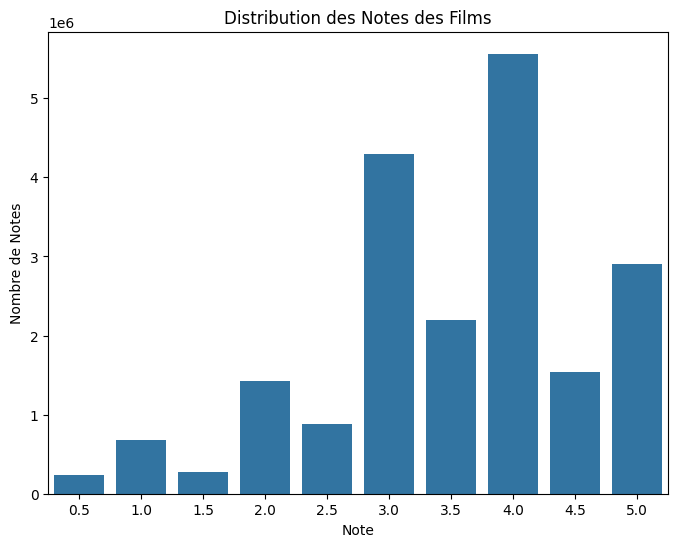

In [ ]:
# Informations sur les DataFrames
print("\nInformations sur 'movies_df':")
movies_df.info()

print("\nInformations sur 'ratings_df':")
ratings_df.info()

# Statistiques descriptives sur les notes
print("\nStatistiques sur les rating :")
display(ratings_df.describe())

# Visualisation de la distribution des notes
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribution des Notes des Films')
plt.xlabel('Note')
plt.ylabel('Nombre de Notes')
plt.show()

### 1.1 Nettoyage du DataFrame movies_df

In [ ]:
print("Valeurs manquantes dans 'movies_df':")
print(movies_df.isnull().sum())

Valeurs manquantes dans 'movies_df':
movieId    0
title      0
genres     0
dtype: int64


In [ ]:
# Vérifier si tous les movieId sont uniques
are_movies_unique = movies_df['movieId'].is_unique
print(f"Est-ce que tous les 'movieId' sont uniques ? : {are_movies_unique}")

# Si non, investiguer les doublons
if not are_movies_unique:
    print("\nInvestigation des 'movieId' en double :")
    duplicated_movies = movies_df[movies_df.duplicated(subset=['movieId'], keep=False)]
    print(duplicated_movies)

# Vérifier si tous les ratings
    display(duplicated_movies.sort_values('movieId'))

Est-ce que tous les 'movieId' sont uniques ? : True


####si c'était non il faut entrer dans un autre processus :

1) Détecter les doublons sur une colonne (par ex. movieId).

2) Comparer les lignes en double :

2.1 - Si les lignes sont identiques sur toutes les colonnes → on supprime les doublons.

2.2 - Si les lignes sont différentes → on garde les deux, mais on modifie l’ID d’une des lignes pour éviter le conflit, en lui donnant un nouvel ID = max(movieId) + 1.

### Nettoyer les colonnes textuelles (title et genres)

1) Pour title : C'est moins critique pour le modèle de recommandation lui-même (car il utilise les ID), mais c'est essentiel pour l'affichage final. Si vous recommandez un film, vous ne voulez pas afficher " Toy Story (1995) ". C'est une bonne pratique de le faire maintenant.

2) Pour genres : C'est également une bonne pratique pour assurer la consistance, surtout si on voulait faire de l'analyse sur les genres plus tard.

In [ ]:
# Nettoyer les espaces superflus
movies_df['title'] = movies_df['title'].str.strip()
movies_df['genres'] = movies_df['genres'].str.strip()
print("Nettoyage des espaces dans 'title' et 'genres' effectué.")

Nettoyage des espaces dans 'title' et 'genres' effectué.


In [ ]:
# Informations sur les DataFrames
print("\nInformations sur 'movies_df':")
display(movies_df.head())

print("\nInformations sur 'ratings_df':")
display(ratings_df.head())



Informations sur 'movies_df':


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



Informations sur 'ratings_df':


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


### 1.2 Nettoyage du DataFrame ratings_df

In [ ]:
print("\nValeurs manquantes dans 'ratings_df':")
print(ratings_df.isnull().sum())


Valeurs manquantes dans 'ratings_df':
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


Analyser la colonne timestamp :

Même si on ne l'utilisera pas pour le premier modèle, c'est bon de vérifier sa cohérence.

In [ ]:
# Le timestamp est en format "epoch time". On peut le convertir.
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'])
print("\nConversion du timestamp en datetime effectuée.")
display(ratings_df[['rating', 'timestamp', 'datetime']].head())


Conversion du timestamp en datetime effectuée.


,rating,timestamp,datetime
0,3.5,2005-04-02 23:53:47,2005-04-02 23:53:47
1,3.5,2005-04-02 23:31:16,2005-04-02 23:31:16
2,3.5,2005-04-02 23:33:39,2005-04-02 23:33:39
3,3.5,2005-04-02 23:32:07,2005-04-02 23:32:07
4,3.5,2005-04-02 23:29:40,2005-04-02 23:29:40


In [ ]:
# ➕ Vérifier s'il y a eu des erreurs de conversion
failed_conversions = ratings_df[ratings_df['datetime'].isna()]

if not failed_conversions.empty:
    print(f"\n {len(failed_conversions)} ligne(s) ont échoué la conversion du timestamp en datetime :")
    display(failed_conversions[['rating', 'timestamp']])
else:
    print("\n Aucune erreur de conversion : tous les timestamps ont été convertis avec succès.")


 Aucune erreur de conversion : tous les timestamps ont été convertis avec succès.


### 1.2.1 Vérifier les doublons de notes (point le plus important !)
Un utilisateur ne devrait noter un film qu'une seule fois. C'est l'hypothèse de base de notre matrice.

In [ ]:
# Vérifier les doublons basés sur la paire (userId, movieId)
rating_duplicates = ratings_df.duplicated(subset=['userId', 'movieId'], keep=False)  # une liste de true flase... de meme taille que ratings_df
num_duplicates = rating_duplicates.sum()

print(f"\nNombre de fois où un utilisateur a noté le même film plusieurs fois : {num_duplicates}")

if num_duplicates > 0:
    print("Affichage des notes en double :")
    display(ratings_df[rating_duplicates].sort_values(by=['userId', 'movieId']))
    # Décision : On peut garder la note la plus récente, la moyenne, ou la première.
    # Garder la dernière est souvent un bon choix.
    ratings_df = ratings_df.drop_duplicates(subset=['userId', 'movieId'], keep='last')
    print("\nDoublons supprimés, en gardant la note la plus récente.")

# On peut maintenant supprimer la colonne 'datetime' qui n'était que pour l'analyse
ratings_df = ratings_df.drop(columns=['datetime'])


Nombre de fois où un utilisateur a noté le même film plusieurs fois : 0


In [ ]:
# Informations sur les DataFrames
print("\nInformations sur 'movies_df':")
display(movies_df.head())

print("\nInformations sur 'ratings_df':")
display(ratings_df.head())


Informations sur 'movies_df':


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



Informations sur 'ratings_df':


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


### 1.3 Fusionner et Finaliser
Maintenant que nos deux DataFrames sont propres, on peut les fusionner.

In [ ]:
# Fusionner les deux dataframes propres
df = pd.merge(ratings_df, movies_df, on='movieId')
print("\nDataFrames propres fusionnés.")
display(df.head(10))


DataFrames propres fusionnés.


,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,112,3.5,2004-09-10 03:09:00,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime
6,1,151,4.0,2004-09-10 03:08:54,Rob Roy (1995),Action|Drama|Romance|War
7,1,223,4.0,2005-04-02 23:46:13,Clerks (1994),Comedy
8,1,253,4.0,2005-04-02 23:35:40,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
9,1,260,4.0,2005-04-02 23:33:46,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


In [ ]:
n_users = df['userId'].nunique()
n_movies = df['movieId'].nunique()
total_actual_ratings = len(df)
total_possible_ratings = n_users * n_movies
density = (total_actual_ratings / total_possible_ratings) * 100

print(f"Nombre d'utilisateurs uniques : {n_users}")
print(f"Nombre de films uniques (notés au moins une fois) : {n_movies}")
print(f"Densité de la matrice : {density:.4f}%")

# Votre suggestion : Films qui n'ont jamais été notés
total_movies_in_db = movies_df['movieId'].nunique()
movies_never_rated = total_movies_in_db - n_movies

if movies_never_rated > 0:
    print(f"\nNombre de films dans la base 'movies.csv' qui n'ont reçu aucune note : {movies_never_rated}")

Nombre d'utilisateurs uniques : 138493
Nombre de films uniques (notés au moins une fois) : 26744
Densité de la matrice : 0.5400%

Nombre de films dans la base 'movies.csv' qui n'ont reçu aucune note : 534


# Étape 2 : Construction et Entraînement du Modèle

Maintenant que nos données sont propres et préparées, nous allons utiliser une bibliothèque spécialisée pour construire notre système de recommandation.

## Introduction à la Bibliothèque `surprise`

**Qu'est-ce que c'est ?**  
`surprise` est une bibliothèque Python conçue spécifiquement pour construire et évaluer des systèmes de recommandation. Son nom est un acronyme (un peu tiré par les cheveux) pour *Simple Python RecommendatIon System Engine*.

**Pourquoi l'utiliser ?**  

- **Simplicité** : Elle rend l'implémentation d'algorithmes complexes comme la factorisation de matrices (SVD) extrêmement simple.  
- **Standardisation** : Elle fournit un cadre de travail complet, avec des outils pour charger les données, effectuer la validation croisée et évaluer les modèles, le tout de manière standardisée.  
- **Richesse** : Elle contient de nombreux algorithmes de recommandation pré-implémentés, ce qui permet de les comparer facilement.  

En résumé, `surprise` est au système de recommandation ce que `scikit-learn` est au Machine Learning classique : une boîte à outils puissante et facile à utiliser.


In [ ]:
# installation de surprise :
!pip install scikit-surprise

## Préparation des Données pour `surprise`

La bibliothèque `surprise` a besoin des données dans un format spécifique. Elle ne peut pas utiliser un DataFrame `pandas` directement. Nous devons lui dire quelles colonnes correspondent à l'utilisateur, à l'item (le film) et à la note.

### Le `Reader`

C'est un objet qui sert à "lire" nos données. On doit lui spécifier l'échelle des notes (`rating_scale`). C'est important pour que l'algorithme sache dans quel intervalle il doit faire ses prédictions.

### `Dataset.load_from_df`

C'est la fonction qui prend notre DataFrame `pandas` et le convertit en un objet `Dataset` que `surprise` peut manipuler.


N.B : l’incompatibilité entre numpy version 2.x et la version actuelle de surprise.

In [ ]:
# Installer une version compatible de numpy
!pip install numpy==1.26.4

# Vérifier la version de numpy
import numpy
print("Numpy version:", numpy.__version__)


Numpy version: 1.26.4


In [ ]:
from surprise import Reader, Dataset

# 1. Créer un objet Reader pour spécifier l'échelle des notes
# Notre échelle va de 0.5 à 5.0
reader = Reader(rating_scale=(0.5, 5.0))

# 2. Charger les données depuis notre DataFrame pandas
# On a besoin de seulement trois colonnes : l'utilisateur, l'item (film), et la note.
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

print("Données converties au format 'surprise' avec succès.")

Données converties au format 'surprise' avec succès.


In [ ]:
print("Numpy version:", numpy.__version__)

Numpy version: 1.26.4


## Choix de l'Algorithme : SVD

Nous allons utiliser l'algorithme le plus célèbre et l'un des plus performants pour le filtrage collaboratif basé sur un modèle : **SVD** (*Singular Value Decomposition*).

### Qu'est-ce que le SVD dans `surprise` ?

C'est une implémentation de l'algorithme de factorisation de matrices que nous avons discuté.  

Il va chercher à découvrir les **caractéristiques latentes** des utilisateurs et des films pour prédire les notes manquantes.  

Son but est de trouver deux petites matrices :

- **U** : les utilisateurs
- **V** : les films  

… dont le produit se rapproche le plus possible de la matrice des notes originale.

---

### Action : Instanciation et Entraînement du Modèle

Le processus avec `surprise` est très simple :

1. On transforme notre `Dataset` en un **trainset**.  
    → Un `trainset` est une structure optimisée que `surprise` utilise pour l'entraînement.  
    → Il contient toutes les infos sur les utilisateurs, les items et leurs interactions.

2. On crée une instance de notre algorithme (ici, **SVD**).

3. On appelle la méthode `.fit()` (ou `.train()`, qui est un alias) sur le `trainset`.


In [ ]:
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Diviser les données en un ensemble d'entraînement et de test
# 80% pour l'entraînement, 20% pour le test
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

print("Données divisées en ensembles d'entraînement et de test.")
print(f"Taille de l'ensemble d'entraînement : {trainset.n_ratings} notes")
print(f"Taille de l'ensemble de test : {testset.__len__()} notes")


# Créer une instance de l'algorithme SVD
algo = SVD(n_factors=100, n_epochs=20, random_state=42)  # tester ce la pour un model plus fort : algo = SVD(n_factors=100, n_epochs=100, reg_all=0.02, random_state=42)
# algo = SVD(n_factors=100, n_epochs=100, reg_all=0.01, random_state=42)
# n_factors: Le nombre de caractéristiques latentes (notre 'k' de l'explication). 100 est une bonne valeur de départ.
# n_epochs: Le nombre de fois que l'algorithme va parcourir toutes les notes pour s'ajuster.



Données divisées en ensembles d'entraînement et de test.
Taille de l'ensemble d'entraînement : 16000210 notes
Taille de l'ensemble de test : 4000053 notes


In [ ]:
# Entraîner l'algorithme sur l'ensemble d'entraînement
print("\nDébut de l'entraînement du modèle SVD...")
algo.fit(trainset)
print("Entraînement terminé !")


Début de l'entraînement du modèle SVD...
Entraînement terminé !


# Étape 3 : Évaluation du Modèle

Maintenant que notre modèle (`algo`) est entraîné, nous devons mesurer sa performance.  

Nous allons lui demander de **prédire les notes** pour un ensemble de test (`testset`), que le modèle n'a jamais vu, et comparer ses prédictions aux vraies notes, mais attention on suppose qu'il déja vue le user lors de l'entai

---

## La Métrique d'Évaluation : RMSE

### Qu'est-ce que la RMSE (*Root Mean Square Error*) ?

C'est la métrique la plus courante pour évaluer les systèmes de recommandation qui prédisent des notes.

---

### Comment ça se calcule (intuitivement) :

1. Pour chaque note dans le `testset`, on calcule la **différence (erreur)** entre la note prédite et la vraie note.
2. On met chaque erreur **au carré** (pour que les erreurs positives et négatives ne s'annulent pas et pour pénaliser plus fortement les grosses erreurs).
3. On calcule la **moyenne** de toutes ces erreurs au carré.
4. On prend la **racine carrée (Root)** du résultat pour revenir à l'échelle originale des notes.

---

### Comment l'interpréter :

👉 Une **RMSE de 0.85** signifie qu'en moyenne, les prédictions de notre modèle s'écartent de la vraie note de **0.85 point** (sur une échelle de 0.5 à 5).  
👉 **Plus la RMSE est basse, meilleur est le modèle.**


In [ ]:
# 1. Faire des prédictions sur l'ensemble de test
predictions = algo.test(testset)

# Afficher quelques prédictions pour voir à quoi ça ressemble
print("Aperçu des 5 premières prédictions :")
for pred in predictions[:5]:
    print(pred)

# 2. Calculer la RMSE
# La bibliothèque 'surprise' a un outil intégré pour cela.
from surprise import accuracy

rmse = accuracy.rmse(predictions)
print(f"\nLa RMSE sur l'ensemble de test est : {rmse:.4f}")

Aperçu des 5 premières prédictions :
user: 130202     item: 1393       r_ui = 3.50   est = 3.68   {'was_impossible': False}
user: 24914      item: 62999      r_ui = 4.00   est = 3.97   {'was_impossible': False}
user: 51507      item: 89804      r_ui = 4.00   est = 3.84   {'was_impossible': False}
user: 69683      item: 7004       r_ui = 2.50   est = 2.53   {'was_impossible': False}
user: 135504     item: 2657       r_ui = 2.00   est = 4.22   {'was_impossible': False}
RMSE: 0.7865

La RMSE sur l'ensemble de test est : 0.7865


## Sauvegarde du Modèle Entraîné
C'est une étape cruciale pour pouvoir réutiliser notre travail. La bibliothèque surprise rend cela très simple. Nous allons sauvegarder l'objet algo qui contient tout ce que le modèle a appris.

La fonction dump :
Qu'est-ce que c'est ? La fonction dump de surprise permet de sauvegarder un modèle entraîné dans un fichier. Elle sauvegarde non seulement l'algorithme et ses poids, mais aussi les prédictions si on le souhaite.
Comment l'utiliser ? On lui donne un chemin de fichier et l'objet à sauvegarder.

In [ ]:
import os
from surprise.dump import dump

# Définir le chemin du fichier où sauvegarder le modèle
# On le sauvegarde dans notre dossier sur Google Drive
file_name = os.path.join(BASE_PATH, 'recommendation_model.pkl')

print(f"\nSauvegarde du modèle dans le fichier : {file_name}")

# Sauvegarder l'objet 'algo' (notre modèle entraîné)
# On peut aussi sauvegarder les prédictions si on veut, mais ici on ne sauvegarde que le modèle.
dump(file_name, algo=algo)

print("Modèle sauvegardé avec succès !")


Sauvegarde du modèle dans le fichier : /content/drive/MyDrive/Colab Notebooks/Système de Recommandation de Films/data/recommendation_model.pkl
Modèle sauvegardé avec succès !


## Visualisation 1 : Distribution des Erreurs de Prédiction

L'idée est de voir comment se répartissent les erreurs. Est-ce que notre modèle se trompe de beaucoup ou de peu en général ? Un bon modèle devrait avoir la plupart de ses erreurs centrées autour de zéro.

### Intérpération :
Comment interpréter ce graphique :

1) Un pic élevé et étroit centré sur 0 est le signe d'un excellent modèle. Cela signifie que la plupart des erreurs sont très faibles.

2) Si le pic est décalé de 0, cela signifie que le modèle a un biais (il a tendance à sur-estimer ou sous-estimer systématiquement les notes).

3) Si la distribution est très large et plate, cela signifie que les erreurs sont grandes et fréquentes.

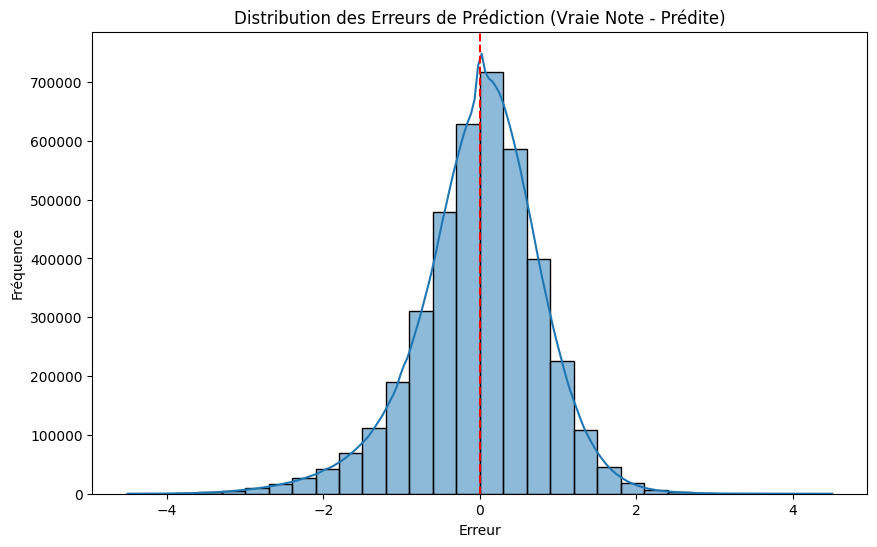

In [ ]:
# 'predictions' est la variable que nous avons créée à l'étape 3
# qui contient les résultats de algo.test(testset)

# Calculer l'erreur pour chaque prédiction
errors = []
for pred in predictions:
    # Erreur = Vraie note - Note prédite
    errors.append(pred.r_ui - pred.est)

# Créer un histogramme des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title('Distribution des Erreurs de Prédiction (Vraie Note - Prédite)')
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.axvline(x=0, color='r', linestyle='--') # Ajoute une ligne à zéro pour référence
plt.show()

## Visualisation 2 : Comparaison entre les Vraies Notes et les Notes Prédites
Cette visualisation nous permet de voir s'il y a une corrélation entre ce que le modèle prédit et la réalité.

### Comment interpréter ce graphique :

1) Plus les points sont regroupés autour de la ligne rouge en pointillés, meilleur est le modèle.

2) Si les points forment un "nuage" très dispersé et sans forme, le modèle est peu performant.

3) Vous remarquerez peut-être que les points ne vont pas jusqu'aux extrêmes (0.5 et 5). C'est normal, les modèles ont tendance à être "conservateurs" et à éviter les prédictions extrêmes.

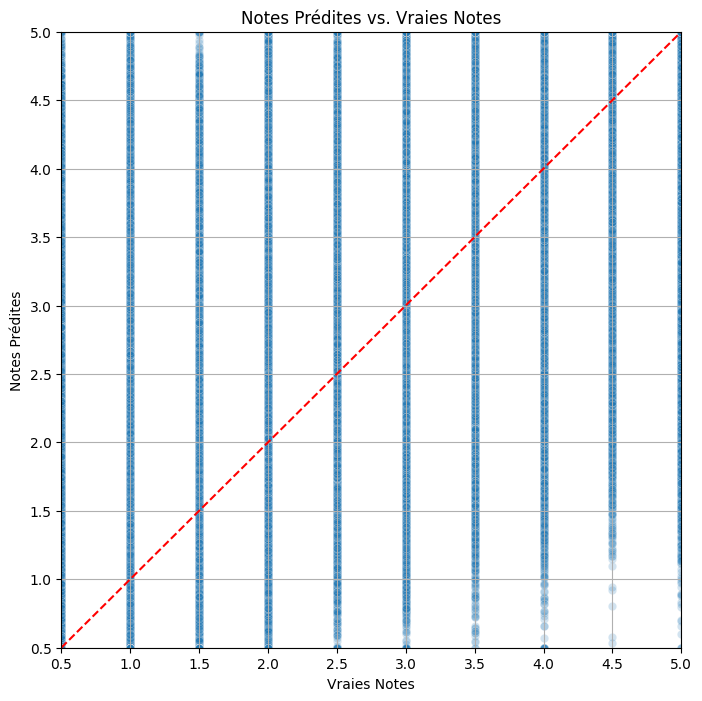

In [ ]:
# Extraire les vraies notes et les notes prédites de l'objet 'predictions'
true_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

# Créer un nuage de points (scatterplot)
plt.figure(figsize=(8, 8))
sns.scatterplot(x=true_ratings, y=predicted_ratings, alpha=0.2) # alpha=0.1 pour la transparence
plt.title('Notes Prédites vs. Vraies Notes')
plt.xlabel('Vraies Notes')
plt.ylabel('Notes Prédites')

# Ajouter une ligne y=x pour voir la perfection
# Si tous les points étaient sur cette ligne, le modèle serait parfait
plt.plot([0.5, 5], [0.5, 5], 'r--')
plt.xlim(0.5, 5)
plt.ylim(0.5, 5)
plt.grid(True)
plt.show()

## Visualisation 3 : Performance par Note (Box Plot)
Cette visualisation répond à la question : "Est-ce que le modèle est meilleur pour prédire les notes élevées (4, 5) que les notes basses (1, 2) ?".

### Comment interpréter ce graphique :

1) Chaque "boîte" représente la distribution des prédictions pour une vraie note donnée.

2) Idéalement, la ligne médiane de la boîte pour la "Vraie Note = 4.0" devrait être à 4.0 sur l'axe Y.

3) Si la boîte pour la "Vraie Note = 1.0" est très haute (par exemple, centrée sur 2.5), cela signifie que le modèle a du mal à prédire les très mauvaises notes et a tendance à les surévaluer.

Cela nous donne une vision très fine des forces et des faiblesses de notre modèle.

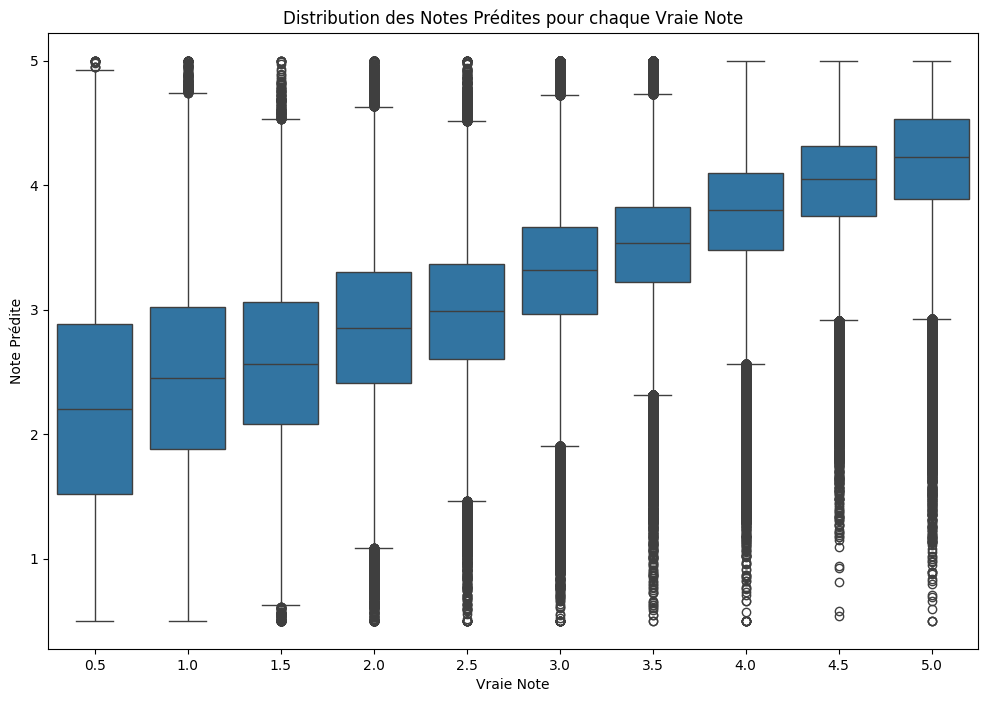

In [ ]:
# Créer un DataFrame pour une manipulation plus facile avec seaborn
df_results = pd.DataFrame({
    'Vraie_Note': true_ratings,
    'Note_Predite': predicted_ratings
})

# Créer un box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Vraie_Note', y='Note_Predite', data=df_results)
plt.title('Distribution des Notes Prédites pour chaque Vraie Note')
plt.xlabel('Vraie Note')
plt.ylabel('Note Prédite')
plt.show()

## Comment Recharger et Utiliser le Modèle Sauvegardé
Pour prouver que cela fonctionne, voici comment, dans un nouveau script (ou après avoir redémarré le noyau), on peut recharger et utiliser ce modèle.

In [ ]:
from surprise.dump import load

# Charger le modèle depuis le fichier
print("\nRechargement du modèle depuis le disque...")
# La fonction load retourne un tuple (prédictions, modèle), on ne prend que le modèle
_, loaded_algo = load(file_name)

print("Modèle rechargé avec succès !")

# Exemple d'utilisation : prédire la note pour un utilisateur et un film spécifiques
# Disons qu'on veut prédire la note que l'utilisateur avec l'ID 1 donnerait au film avec l'ID 302
uid = 1
iid = 302
predicted_rating = loaded_algo.predict(uid=uid, iid=iid)

print(f"\nPrédiction pour l'utilisateur {predicted_rating.uid} et le film {predicted_rating.iid}:")
print(f"Note prédite : {predicted_rating.est:.2f}")


Rechargement du modèle depuis le disque...
Modèle rechargé avec succès !

Prédiction pour l'utilisateur 1 et le film 302:
Note prédite : 3.68


# Analyse de la conversation AI - Questions / Réponses

---

### Question 1.1

**Votre idée :**  
"Un utilisateur déjà vu par le modèle lors du training [...] le système cherche son vecteur de latente et puis il fait le produit scalaire avec chaque film dont l'id était passé, le résultat c'est la note prédite que l'utilisateur va donner à chacun des films."

**Réponse de l'AI :**  
C'est 100% correct  
Produit scalaire : [u1, u2, u3] ⋅ [v1, v2, v3] = u1*v1 + u2*v2 + u3*v3 (donne un seul nombre : la note).  

---

### Question 1.2

**Votre idée :**  
"Un utilisateur vient de rejoindre notre plateforme [...] on arrive à obtenir sa note pour quelques films, le modèle ne sera capable directement de lui recommander les films, il faut rafraîchir le training [...] et dans ce cas tout le process d'entrainement est répété."

**Réponse de l'AI :**  
C'est parfaitement exact. C'est précisément le cycle de vie d'un système de recommandation en production.

- **Phase "Cold Start"** : L'utilisateur est nouveau. On lui montre des recommandations non personnalisées (films populaires, mieux notés, etc.).
- **Collecte de données** : L'utilisateur interagit, note quelques films. Ces nouvelles notes sont stockées dans la base de données.
- **Phase "Re-Training"** : Le modèle actuel ne connaît toujours pas cet utilisateur. Il faut attendre la prochaine session d'entraînement planifiée (toutes les 24h, chaque semaine...).
- **Le nouvel entraînement** : Le processus est relancé sur l'ensemble des données, y compris les nouvelles notes du nouvel utilisateur. Le modèle apprendra alors un vecteur de caractéristiques latentes pour ce nouvel utilisateur.
- **Phase de personnalisation** : Après ce nouvel entraînement, l'utilisateur recevra enfin des recommandations personnalisées basées sur le filtrage collaboratif.

Vous avez parfaitement compris le caractère "statique" du modèle entre deux entraînements.

---

### Question 1.3

**Votre idée :**  
"Pour la partie des données utilisée par le test, normalement ces données [...] doivent être déjà vues par le système [...] sinon si par exemple parmi les 20% qu'on a pris, on a un utilisateur qui a donné une seule note et cette note qui était prise pour le test, alors le système lors du training n'a jamais vu cet utilisateur ?"

**Réponse de l'AI :**  
Vous avez identifié un problème potentiel très subtil de la division `train_test_split`. Votre analyse est correcte : si TOUTES les notes d'un utilisateur ou d'un film se retrouvent dans l'ensemble de test, cet utilisateur/film devient un "cold start" pour l'évaluation, ce qui n'est pas ce que l'on veut.

**Comment la bibliothèque Surprise gère-t-elle cela (et comment devrait-on le gérer) ?**

- La bibliothèque Surprise est assez basique sur ce point. Un `train_test_split` simple peut effectivement créer ce problème, bien que ce soit rare pour les utilisateurs/films ayant beaucoup de notes.

**Dans un cadre plus rigoureux, la procédure correcte est la suivante :**

- **Filtrer les données au préalable** : Avant de faire le `train_test_split`, on s'assure que l'on ne garde que les utilisateurs et les films qui ont un nombre minimum d'interactions (ex. : utilisateurs qui ont noté au moins 5 films, films notés au moins 10 fois). Cela garantit qu'après la division, il est très probable que chaque utilisateur/film du test soit aussi présent dans le train.
  
- **Stratégies de validation croisée spécifiques** : Il existe des stratégies de validation plus intelligentes qui garantissent que pour chaque utilisateur, certaines de ses notes sont dans le train et d'autres dans le test.

**Mais pour répondre à votre question :**  
Oui, si un utilisateur n'a qu'une seule note et qu'elle tombe dans le testset, le modèle ne pourra pas faire de prédiction pour lui.  
La fonction `algo.test(testset)` de Surprise gère cela : si elle rencontre une note dans le test pour un utilisateur ou un film qu'elle n'a pas vu dans le trainset, elle ne peut pas calculer les vecteurs et prédit simplement la note moyenne de toutes les notes du trainset. Cela pénalisera la performance (la RMSE), ce qui est normal car le modèle admet son "ignorance".

---

### Clarification supplémentaire : différence entre `algo.predict()` et `algo.test()`

**algo.test(testset)** : Pour l'ÉVALUATION  
- **Entrée** : Une liste de notes connues (le testset).  

- **Sortie** : Une liste d'objets `Prediction` qui contiennent chacun : l'utilisateur, le film, la vraie note,la note prédite, false/true ; false montra que l'utilisateur est connu par le système, true signifie que user n'est pas connu par le système et la note predis est simplement la moyenne de tout les notes données lors de training.

- **But** : Comparer les prédictions à la réalité pour calculer la RMSE.

**algo.predict(uid, iid)** : Pour la RECOMMANDATION en situation réelle  
- **Entrée** : Un utilisateur `uid` et un film `iid` pour lesquels on ne connaît pas la note.  
- **Sortie** : Un seul objet `Prediction` qui contient : l'utilisateur, le film, la note prédite, et une mention indiquant que la vraie note n'était pas disponible.  
- **But** : Prédire une note inconnue pour décider si on doit recommander ce film.

---

🎉 **Conclusion générale :**  
Vous avez une excellente intuition et vous posez les bonnes questions pour comprendre les limites et les détails pratiques de l'implémentation. Continuez comme ça !

---





## Comportement du système en production et en test

**En production**  
On fournit l'`id_user` et la liste des films non vus et non notés par cet utilisateur.  
Le modèle recherche le vecteur latent de cet utilisateur ainsi que les vecteurs latents des films, qui ont été créés lors de l'entraînement.  
Si ces vecteurs sont trouvés, alors, grâce à un **produit scalaire**, le modèle génère une liste de notes prédites que cet utilisateur donnerait à chaque film.  
On peut ensuite sélectionner, par exemple, les **10 meilleures notes** et afficher les films correspondants.

**En test (dans un notebook)**  
Si l'on passe un utilisateur inconnu, le système renvoie automatiquement la **moyenne des notes** observées pendant l'entraînement.



# Le Problème : Du Notebook à l'Application

Actuellement, pour obtenir une recommandation, il faut exécuter manuellement une cellule dans le notebook.  
L'objectif de la mise en production est de créer un service autonome et robuste qu'une application (web, mobile, etc.) peut interroger à tout moment pour obtenir des recommandations, sans jamais toucher au code d'entraînement.  
Ce service prendra la forme d'une API (Application Programming Interface).

---

# Les Étapes de Mise en Production (MLOps)

Pipeline typique et moderne pour déployer ce type de modèle :

---

## Étape 1 : Créer une API Web avec FastAPI

**Concept**  
Création d'un petit serveur web en Python. Ce serveur aura un point de terminaison (endpoint), par exemple :  
`http://mon-api.com/recommendations/{user_id}`  

Lorsqu'une application envoie une requête à cette URL, le serveur exécute la logique de recommandation et renvoie les résultats.

**Outil**  
FastAPI — Framework web Python moderne, rapide et simple, idéal pour créer des API pour le Machine Learning.

**Exemple de code (`main.py`)**  

```python
from fastapi import FastAPI
from surprise.dump import load
import pandas as pd

# Initialisation de l'application FastAPI
app = FastAPI(title="API de Recommandation de Films", version="1.0")

# Chargement des modèles et des données (au démarrage uniquement)
print("Chargement des modèles et des données...")
_, algo = load('./models/recommendation_model.pkl')  # Chemin vers le modèle sauvegardé
movies_df = pd.read_csv('./data/movies.csv')
ratings_df = pd.read_csv('./data/ratings.csv')
print("Chargement terminé.")

# Fonction de recommandation pour l'API
def get_top_n_for_api(user_id, n=10):
    # Logique de recommandation (identique à la fonction 'get_top_n_recommendations' du notebook)
    # ...
    return top_n_recommendations

# Point de terminaison de l'API
@app.get("/recommendations/{user_id}")
def get_recommendations(user_id: int, n: int = 10):
    """
    Retourne les N meilleures recommandations pour un utilisateur donné.
    """
    print(f"Requête reçue pour l'utilisateur {user_id} avec N={n}")

    if user_id not in ratings_df['userId'].unique():
        return {"error": f"Utilisateur {user_id} inconnu. Impossible de générer des recommandations personnalisées."}

    recommendations = get_top_n_for_api(user_id, n)
    
    return {"user_id": user_id, "recommendations": recommendations}


## Étape 2 : Containeriser l'Application avec Docker
###Concept

L'API a des dépendances (Python, FastAPI, Pandas, Surprise, etc.).
Pour s'assurer qu'elle fonctionne partout (PC local, serveur d'un collègue, cloud), on la place dans un conteneur Docker.

Outil Docker — Technologie standard pour la containerisation.

Exemple de fichier Dockerfile :



In [ ]:
# 1. Image de base officielle Python
FROM python:3.9-slim

# 2. Répertoire de travail
WORKDIR /app

# 3. Copier le fichier des dépendances
COPY requirements.txt .

# 4. Installer les dépendances
RUN pip install --no-cache-dir -r requirements.txt

# 5. Copier le reste du code
COPY . .

# 6. Démarrer le serveur FastAPI avec Uvicorn
CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "80"]


# Étape 3 : Déployer le Conteneur sur le Cloud
##Concept

Déployer l'image Docker sur un serveur cloud, accessible 24/7.

##Plateformes possibles :

### Simples (PaaS — Platform as a Service) :

Hugging Face Spaces : Idéal pour les démos ML (Gradio, Streamlit ou Docker).

Heroku / Render : Populaires pour déployer des images Docker.

### Avancées (IaaS — Infrastructure as a Service) :

AWS : Amazon ECS (Elastic Container Service), EKS (Elastic Kubernetes Service).

GCP : Google Cloud Run (simple), GKE (Google Kubernetes Engine).

Microsoft Azure : Azure Container Apps, AKS (Azure Kubernetes Service).

## 🔁 Étape 4 : Monitoring et Automatisation (CI/CD)

### 🧠 Le concept

Une fois l'application en production, il est essentiel de :

- **Surveiller** que tout fonctionne correctement.
- **Automatiser** les mises à jour et les déploiements.

### 🛠️ Les outils

#### 📈 Monitoring

Utiliser des outils de supervision comme :

- **Prometheus / Grafana**
- **Amazon CloudWatch**
- **Google Cloud Monitoring**

👉 Ces outils permettent de suivre :

- L'utilisation du **CPU** et de la **mémoire**
- Le nombre d'**erreurs d'API**
- Les **temps de réponse**
- La **disponibilité** du service

#### ⚙️ CI/CD (Continuous Integration / Continuous Deployment)

Mettre en place un pipeline d'automatisation avec :

- **GitHub Actions**
- **Jenkins**

🔄 À chaque mise à jour du code (ex : push sur GitHub), le pipeline peut :

1. ✅ **Lancer les tests** (vérifier que le code fonctionne)
2. 🐳 **Construire une nouvelle image Docker**
3. 🚀 **Déployer automatiquement** la nouvelle version **sur le cloud** — sans interruption de service

🎯 Objectif : Un déploiement fluide, rapide, sans erreur humaine.


## ✅ Résumé du Workflow de Production

### 🧪 Développement Local

Vous créez votre application API avec **FastAPI** sur votre machine locale.  
C'est là que vous testez et développez les fonctionnalités.

---

### 📦 Packaging

Vous écrivez un **Dockerfile** pour créer une image **portable** de votre application.  
Cela permet de l’exécuter partout où Docker est installé, sans se soucier de l’environnement.

---

### ☁️ Déploiement

Vous poussez cette image sur un **service Cloud** comme :

- **AWS ECS**
- **Google Cloud Run**
- **Azure Container Apps**

🔗 L'application devient alors accessible via une **URL publique**.

---

### ⚙️ Automatisation (CI/CD)

Vous mettez en place un pipeline **CI/CD** (ex : **GitHub Actions**) pour que :

- Les modifications soient automatiquement testées.
- Une nouvelle image Docker soit construite.
- La nouvelle version soit déployée **sans intervention manuelle**.

---

### 🔄 Cycle de Vie du Modèle

- Le modèle est **ré-entraîné périodiquement** (par exemple, chaque jour).
- Le nouveau fichier de modèle est **déployé** sur le serveur.
- L’API le **recharge automatiquement** au redémarrage.

✅ Résultat : Les **recommandations sont toujours à jour**, sans action manuelle nécessaire.

---

Ce processus complet correspond à ce qu’on appelle un **workflow de production moderne** pour une application **ML en API**.
